In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as sts
import lightgbm as gbm

C:\Users\Balakrishna_Vema\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Balakrishna_Vema\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Balakrishna_Vema\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Balakrishna_Vema\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users

In [10]:
hr = pd.read_csv(r"C:\Users\Balakrishna_Vema\Documents\Data science\Data sets\HR_comma_sep (1).csv")

In [11]:
hr.shape

(14999, 10)

In [13]:
hr = hr.rename(columns= lambda x:x.strip())

In [14]:
hr.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [107]:
hr["number_project"] = hr["number_project"].astype(str)
hr["time_spend_company"]=hr["time_spend_company"].astype(str)
hr["number_project"] = hr["number_project"].astype(str)
hr["salary"]=hr["salary"].astype(int)

In [65]:
from scipy.stats import stats

In [87]:
from sklearn.preprocessing import LabelEncoder
hr1 = LabelEncoder()
hr["salary"] = hr1.fit_transform(hr["salary"])
hr["Departments"] = hr1.fit_transform(hr["Departments"])

In [102]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int32  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int32  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  int32  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int32(3), int64(5)
memory usage: 996.2 KB


In [93]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(hr1, test_size=0.2, random_state=0)

TypeError: Singleton array array(LabelEncoder(), dtype=object) cannot be considered a valid collection.

In [83]:
x_train = train.drop(["left"], axis=1)
y_train = train["left"]
x_test = test.drop(["left"], axis=1)
y_test = test["left"]

In [92]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [84]:
model = gbm.LGBMClassifier()

In [85]:
model.fit(x_train,y_train)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: Departments, salary

In [26]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


[Text(0, 0, 'sales'),
 Text(0, 0, 'accounting'),
 Text(0, 0, 'hr'),
 Text(0, 0, 'technical'),
 Text(0, 0, 'support'),
 Text(0, 0, 'management'),
 Text(0, 0, 'IT'),
 Text(0, 0, 'product_mng'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'RandD')]

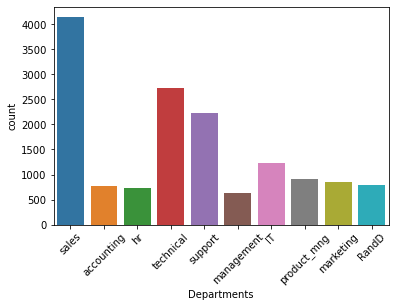

In [51]:
chart = sns.countplot(hr["Departments"])

chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

[Text(0, 0, '0'), Text(0, 0, '1')]

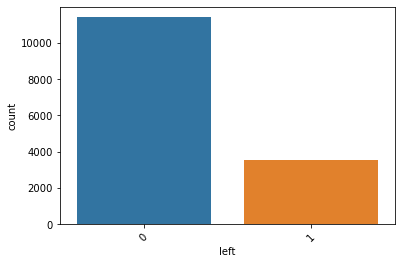

In [52]:
chart = sns.countplot(hr["left"])

chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

In [38]:
pd.DataFrame(hr["promotion_last_5years"]).count()

promotion_last_5years    14999
dtype: int64

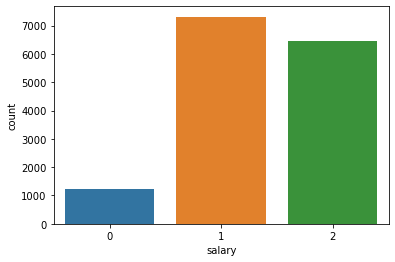

In [100]:
sns.countplot(x=hr["salary"], data=hr)

In [110]:
sns.lmplot(x=hr["salary"], y=hr["left"], data=hr)

KeyError: "None of [Int64Index([0, 1, 2], dtype='int64')] are in the [columns]"